In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

In [181]:
df = pd.read_csv('../dataset/data_pip.csv')
df.head()

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kesekolah(Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa,Status_KIP,Status_PKH
0,1.0,GALAN PRASETIO,Bimbingan dan Konseling | Reguler,L,Dekat,SMAN 1 GEDONG TATAAN,2020.0,21.0,Ikut,Ikut,3.57,Wiraswasta,Sedang,4.0,Terima,Ya,Tidak
1,2.0,FINGKY RANDIANSYAH,Bimbingan dan Konseling | Reguler,L,Dekat,SMK HAMPAR BAIDURI,2020.0,21.0,Tidak,Ikut,2.95,Buruh,Sedang,2.0,Tidak,Tidak,Tidak
2,3.0,ADELIA PANE,Bimbingan dan Konseling | Reguler,P,Dekat,SMK HAMPAR BAIDURI,2020.0,21.0,Tidak,Ikut,3.67,Petani,Sedang,4.0,Terima,Tidak,Tidak
3,4.0,DWI HANDOKO,Bimbingan dan Konseling | Reguler,L,Dekat,SMA MA'ARIF NU BUMIRESTU,2020.0,21.0,Tidak,Ikut,3.19,Wiraswasta,Tinggi,2.0,Tidak,Ya,Tidak
4,5.0,DESTRI FERAWANTI GUSTINI,Bimbingan dan Konseling | Reguler,P,Jauh,SMA 2 NEGERI AGUNG,2020.0,21.0,Tidak,Ikut,3.19,Wiraswasta,Sedang,2.0,Tidak,Ya,Tidak


# EDA

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  1042 non-null   float64
 1   Nama Lengkap                        1042 non-null   object 
 2   Prodi                               1042 non-null   object 
 3   Jenis Kelamin                       1042 non-null   object 
 4   Jarak Tempat Tinggal kesekolah(Km)  1042 non-null   object 
 5   Asal Sekolah                        1042 non-null   object 
 6   Tahun Lulus                         1042 non-null   float64
 7   SKS                                 1042 non-null   float64
 8   Ikut Organisasi                     1042 non-null   object 
 9   Ikut UKM                            1042 non-null   object 
 10  IPK                                 1042 non-null   float64
 11  Pekerjaan Orang Tua                 1042 no

In [183]:
# hapus kolom yang tidak diperlukan
df.drop(
    columns=[
        'No', 
        'Nama Lengkap', 
        'Prodi', 
        'Jenis Kelamin', 
        'Asal Sekolah', 
        'Tahun Lulus', 
        'SKS', 
        'Ikut Organisasi', 
        'Ikut UKM', 
        'IPK',
    ], 
    inplace=True
)


In [184]:
df.describe()

,Tanggungan
count,1042.000000
mean,2.589251
std,1.185163
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


In [185]:
# cek kolom kosong
df.isnull().sum()

Jarak Tempat Tinggal kesekolah(Km)     0
Pekerjaan Orang Tua                    0
Penghasilan                            0
Tanggungan                             0
Status Beasiswa                        0
Status_KIP                            42
Status_PKH                            42
dtype: int64

In [186]:
# hapus baris yang memiliki nilai kosong
df.dropna(axis=0, inplace=True)

In [187]:
df.isnull().sum()

Jarak Tempat Tinggal kesekolah(Km)    0
Pekerjaan Orang Tua                   0
Penghasilan                           0
Tanggungan                            0
Status Beasiswa                       0
Status_KIP                            0
Status_PKH                            0
dtype: int64

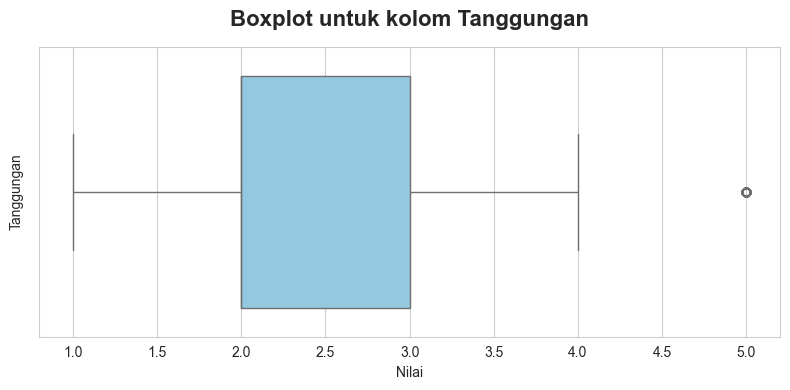

In [188]:
# tampilkan boxplot dari numerik kolom
nums_kolom = df.select_dtypes(include=['number']).columns

sns.set_style("whitegrid")

for col in nums_kolom:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="skyblue", orient="h")
    plt.title(f"Boxplot untuk kolom {col}", fontsize=16, weight='bold', pad=15)
    plt.xlabel("Nilai")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

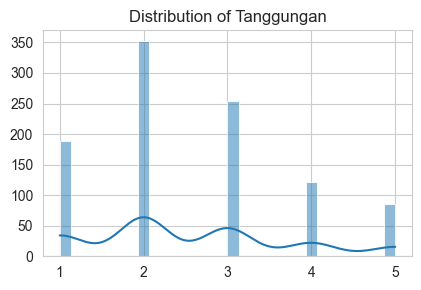

In [189]:
def plot_numerical_distributions_grid(data, columns, cols=3):
    rows = (len(columns) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten() 

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Hilangkan subplot kosong jika ada
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Panggil fungsi
plot_numerical_distributions_grid(df, nums_kolom, cols=3)

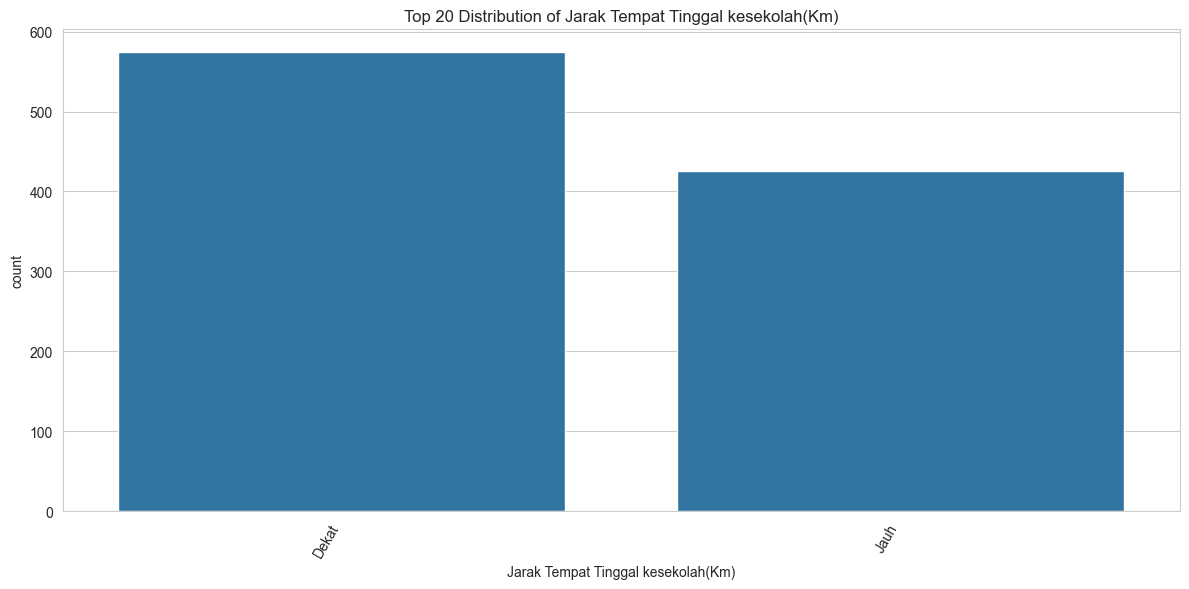

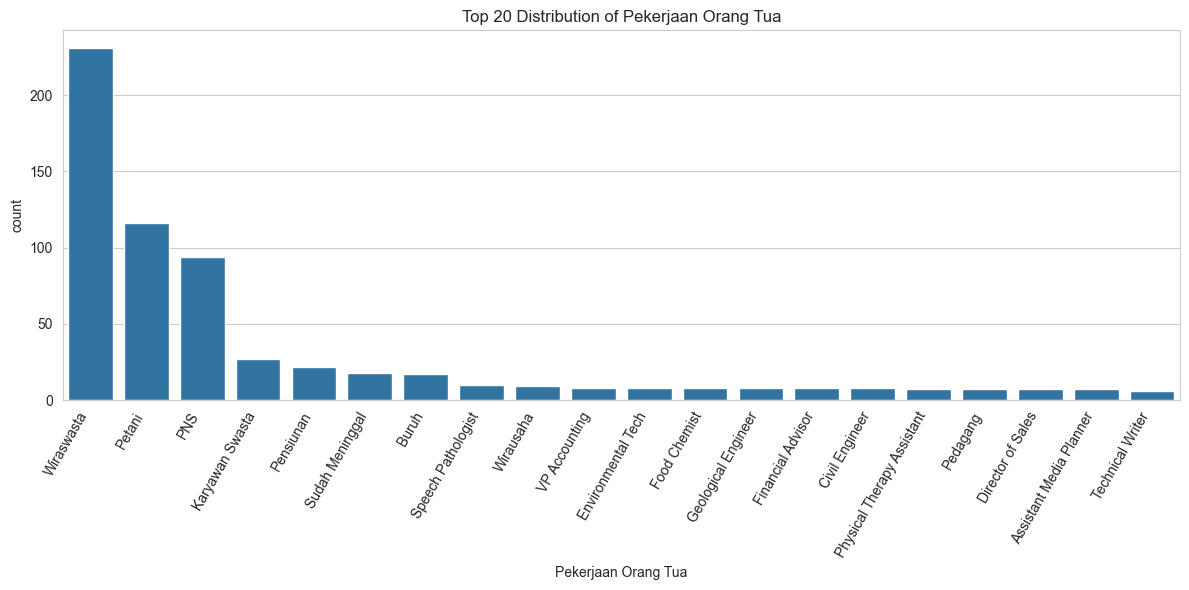

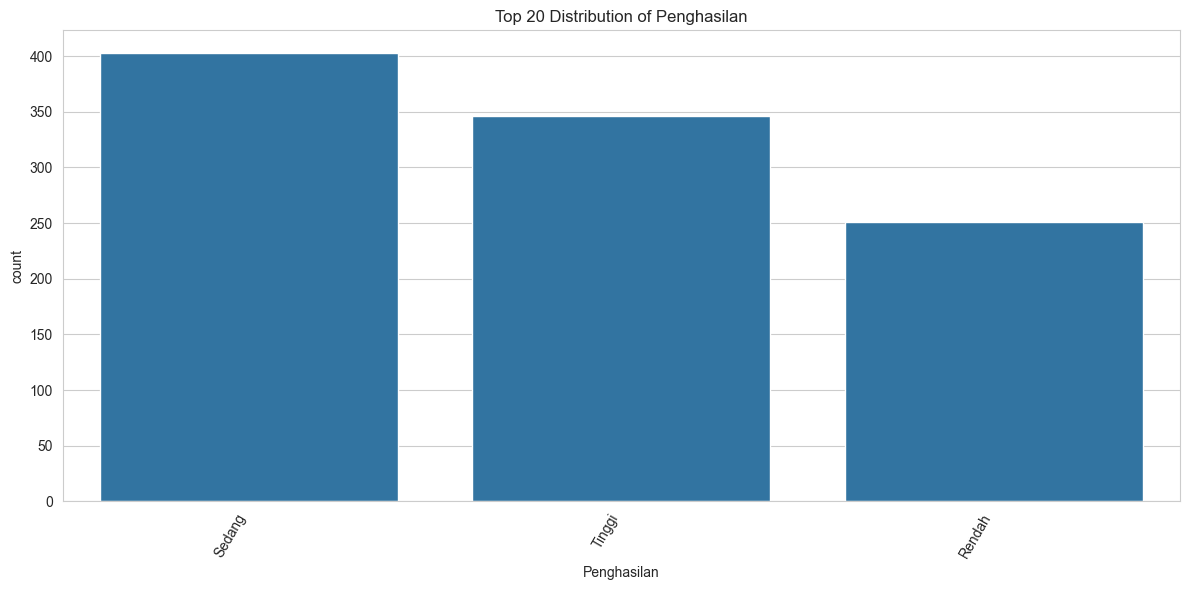

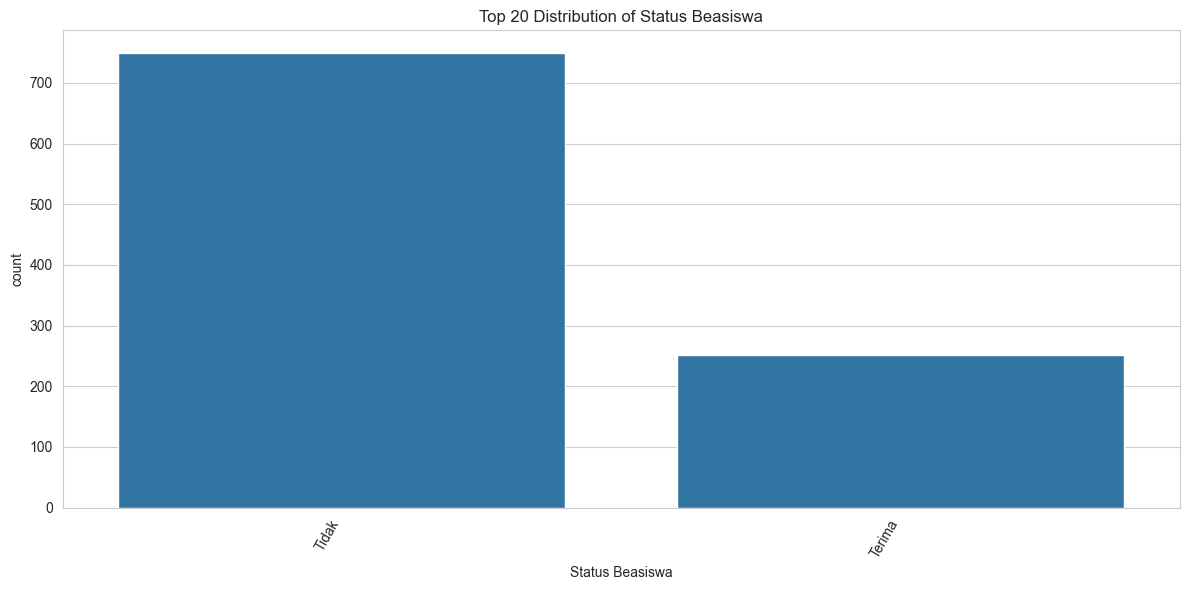

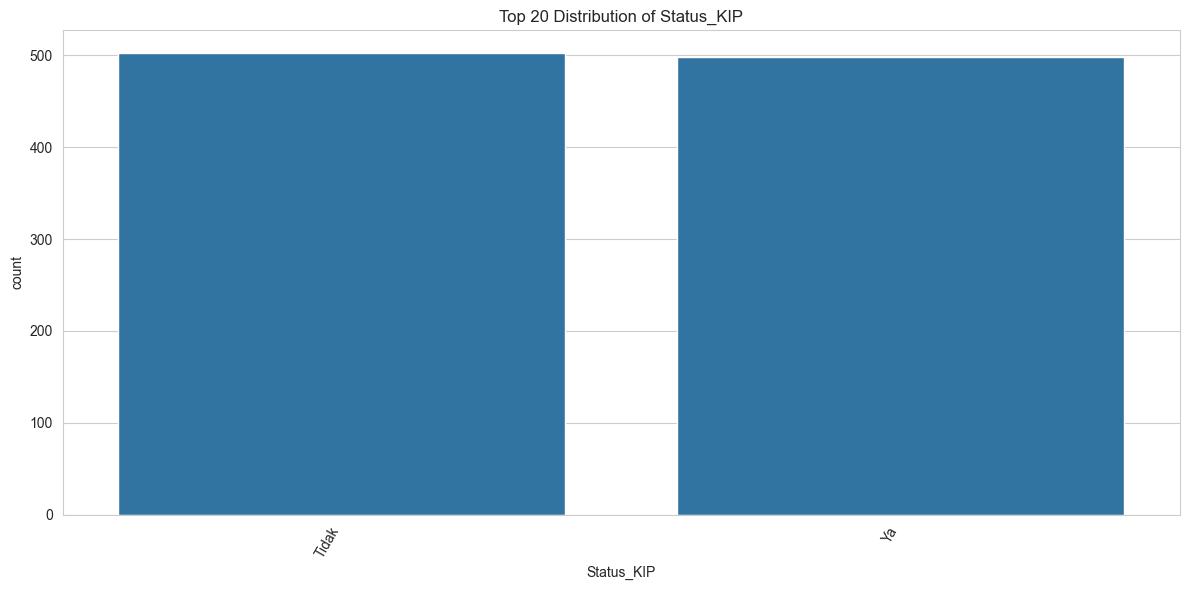

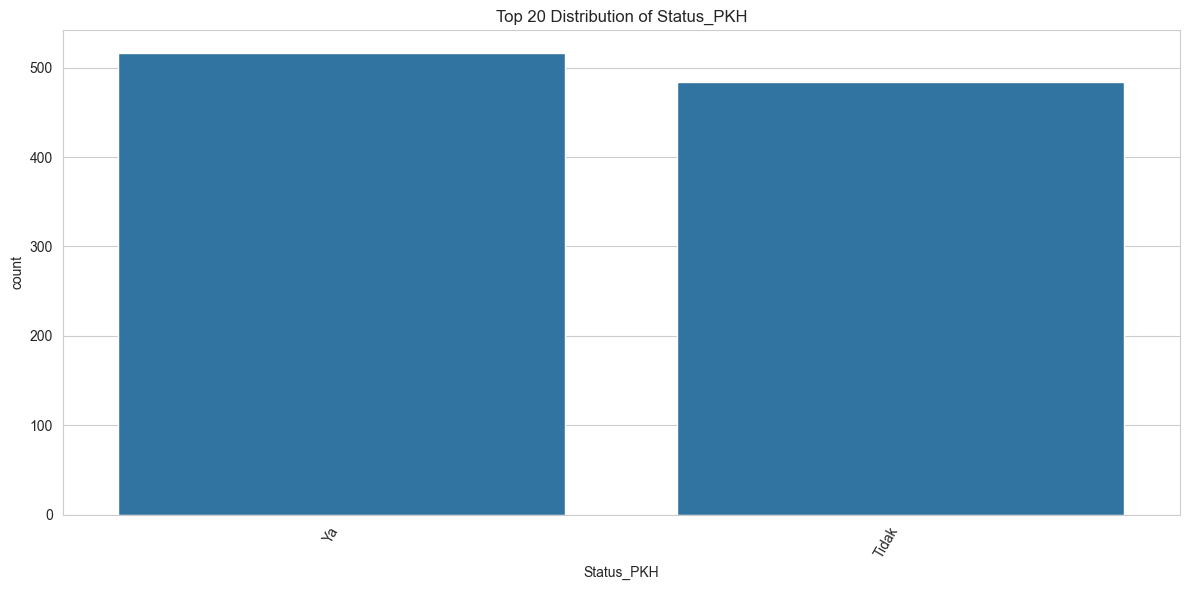

In [190]:
cat_kolom = df.select_dtypes(include=['object']).columns

def plot_top_categories(data, column, top_n=20):
    top_categories = data[column].value_counts().nlargest(top_n).index
    plt.figure(figsize=(12,6))
    sns.countplot(data=data[data[column].isin(top_categories)], x=column, order=top_categories)
    plt.xticks(rotation=60, ha='right')
    plt.title(f'Top {top_n} Distribution of {column}')
    plt.tight_layout()
    plt.show()

for col in cat_kolom:
    plot_top_categories(df, col, top_n=20)


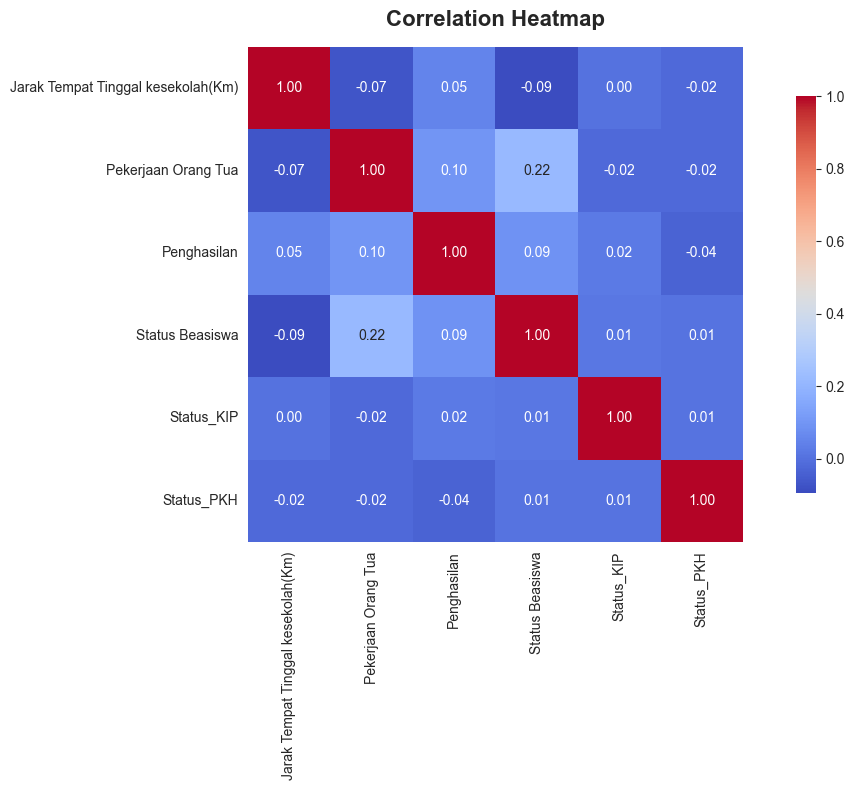

In [191]:
df_heatmap = df[cat_kolom].copy()

# label encoding df heatmap
le = LabelEncoder()

df_heatmap[cat_kolom] = df_heatmap[cat_kolom].apply(le.fit_transform)

# hitung korelasi
corr = df_heatmap.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16, weight='bold', pad=15)
plt.tight_layout()
plt.show()

In [197]:
# cek data duplicate
df.duplicated().sum()

270

In [200]:
# tampilkan data mana yang duplicate
duplicates = df[df.duplicated(keep='first')]
duplicates

,Jarak Tempat Tinggal kesekolah(Km),Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa,Status_KIP,Status_PKH
20,Dekat,Petani,Rendah,2.0,Tidak,Tidak,Ya
43,Dekat,Petani,Rendah,3.0,Tidak,Ya,Ya
45,Dekat,Wiraswasta,Sedang,3.0,Tidak,Tidak,Ya
53,Dekat,Buruh,Rendah,2.0,Tidak,Ya,Ya
59,Dekat,Wiraswasta,Tinggi,3.0,Tidak,Ya,Ya
...,...,...,...,...,...,...,...
538,Dekat,Pensiunan,Sedang,2.0,Tidak,Tidak,Tidak
539,Dekat,Petani,Sedang,2.0,Tidak,Tidak,Ya
540,Dekat,Wiraswasta,Tinggi,2.0,Tidak,Tidak,Ya
839,Dekat,Tax Accountant,Tinggi,2.0,Terima,Ya,Tidak


In [202]:
# hapus data duplicate
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Jarak Tempat Tinggal kesekolah(Km)  730 non-null    object 
 1   Pekerjaan Orang Tua                 730 non-null    object 
 2   Penghasilan                         730 non-null    object 
 3   Tanggungan                          730 non-null    float64
 4   Status Beasiswa                     730 non-null    object 
 5   Status_KIP                          730 non-null    object 
 6   Status_PKH                          730 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.1+ KB


In [204]:
df.to_csv('../dataset/data_pip_cleaned.csv', index=False)